## 知識情報学第7回演習サンプルプログラム ex7.ipynb
- Programmed by Ken-ichi Fukui
- Last updated: 2023/11/13
- Checked with Python 3.8.16, scikit-learn 1.3.2
- MIT License

## 多層パーセプトロンによる手書き文字認識

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# openmlからMNISTデータをダウンロード
X_all, y_all = fetch_openml('mnist_784', return_X_y=True, parser='auto')

# 最初の2000点のみ使用する
n_sub_data = 2000
X_sub, y_sub = X_all[:n_sub_data], y_all[:n_sub_data]

### 課題1(a) PCAにより次元圧縮を行い，圧縮後の空間でMLPにより学習するように変更する．
- PCAによる次元圧縮は関数化すると良い
- MLP Classifier
    - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [6]:
n_components = 10
X_red = PCA(n_components=10).fit_transform(X_sub)

mlp = MLPClassifier(
        hidden_layer_sizes=(100,), #隠れ層のノード数
        activation='relu',         #活性化関数
        solver='adam',             #最適化アルゴリズム
)
mlp.fit(X_red, y_sub)
acc_trn = mlp.score(X_red, y_sub)
print(acc_trn)

1.0


### 損失関数の学習曲線をプロット

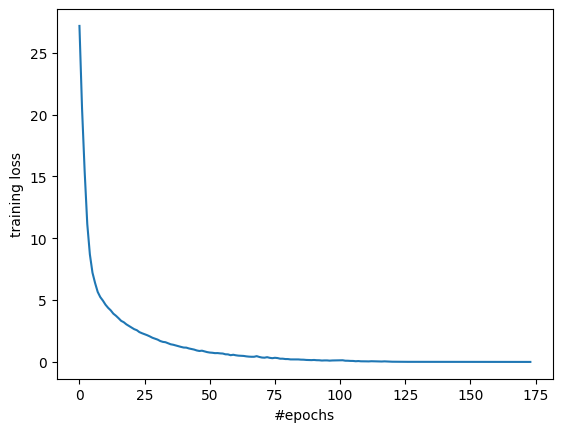

In [7]:
plt.plot(mlp.loss_curve_)
plt.xlabel("#epochs")
plt.ylabel("training loss")
plt.show()

### 課題1(b) 早期停止を設定し，検証データに対するAccuarcyの学習曲線をプロット
- 早期停止も過学習を抑制する方法のひとつ．検証データでAccuracyもしくはLossが一定期間停滞したら学習を停止する

0.8785


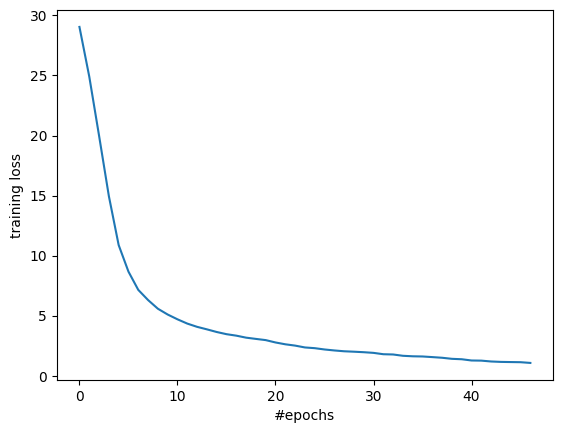

In [12]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100,), #隠れ層のノード数
    activation='relu',         #活性化関数
    solver='adam',             #最適化アルゴリズム
    early_stopping=True,       #早期停止を有効化
    n_iter_no_change=20,       #停滞の判定に用いるエポック数
)
mlp.fit(X_red, y_sub)
acc_trn = mlp.score(X_red, y_sub)
print(acc_trn)

plt.plot(mlp.loss_curve_)
plt.xlabel("#epochs")
plt.ylabel("training loss")
plt.show()

### 課題2: 主成分数，隠れノード数，学習データ数の影響を考察
- あるパラメータを振る時は，その他のパラメータは固定で良い
- 評価方法についても各自で考えること
- ヒント：ValidationCurveDisplay, LearningCurveDisplayを使用すると隠れノード数，学習データ数に対する描画が簡単にできる
  - 使用しなくても良い
  - scikit-learn 1.3以上
  - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ValidationCurveDisplay.html
  - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LearningCurveDisplay.html

### 主成分数による影響
主成分数が小さい場合にaccuracyが低下することが見受けられた。これは、次元圧縮により分類に必要な情報が一部失われたためだと考えられる。主成分数20以上ではaccuracyの低下は見受けられなかった。

In [3]:
# Define a range of dimension values
dimension_values = [5, 10, 20, 50, 100, 200, 500]

# Initialize an empty list to store the accuracies
accuracies = []

# Iterate over the dimension values
for n_components in dimension_values:
    # Perform PCA dimensionality reduction
    X_red = PCA(n_components=n_components).fit_transform(X_sub)

    # Train an MLP classifier
    mlp = MLPClassifier(
        hidden_layer_sizes=(100,),
        activation='relu',
        solver='adam',
    )
    mlp.fit(X_red, y_sub)

    # Calculate the accuracy on the training data
    acc_trn = mlp.score(X_red, y_sub)
    accuracies.append(acc_trn)

# Print the accuracies
for n_components, acc in zip(dimension_values, accuracies):
    print(f"Dimension: {n_components}, Accuracy: {acc}")


Dimension: 5, Accuracy: 0.799
Dimension: 10, Accuracy: 0.997
Dimension: 20, Accuracy: 1.0
Dimension: 50, Accuracy: 1.0
Dimension: 100, Accuracy: 1.0
Dimension: 200, Accuracy: 1.0
Dimension: 500, Accuracy: 1.0


### 隠れノード数による影響
隠れノード数が小さい場合にaccuracyが低下することが見受けられた。これは、隠れノード数が少ないことで識別関数を十分に表現できなかったためだと考えられる。隠れノード数100以上ではaccuracyの低下は見受けられなかった。

In [6]:
# Define a range of hidden node values
hidden_node_values = [10, 20, 30, 40, 50, 100, 200, 500, 1000]

# Initialize an empty list to store the accuracies
accuracies = []

# Iterate over the hidden node values
for hidden_nodes in hidden_node_values:
    X_red = PCA(n_components=500).fit_transform(X_sub)

    # Train an MLP classifier with the specified number of hidden nodes
    mlp = MLPClassifier(
        hidden_layer_sizes=(hidden_nodes,),
        activation='relu',
        solver='adam',
    )
    mlp.fit(X_red, y_sub)

    # Calculate the accuracy on the training data
    acc_trn = mlp.score(X_red, y_sub)
    accuracies.append(acc_trn)

# Print the accuracies
for hidden_nodes, acc in zip(hidden_node_values, accuracies):
    print(f"Hidden Nodes: {hidden_nodes}, Accuracy: {acc}")


/Users/wadatetsuya/Documents/work/lecture-knowledgeinformation/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Nodes: 10, Accuracy: 0.9765
Hidden Nodes: 20, Accuracy: 1.0
Hidden Nodes: 30, Accuracy: 1.0
Hidden Nodes: 40, Accuracy: 1.0
Hidden Nodes: 50, Accuracy: 1.0
Hidden Nodes: 100, Accuracy: 1.0
Hidden Nodes: 200, Accuracy: 1.0
Hidden Nodes: 500, Accuracy: 1.0
Hidden Nodes: 1000, Accuracy: 1.0


### 学習データ数の影響
- データ数が大きいとaccuracyが低下する傾向が見受けられた。これは少ないデータ数ではmlpが学習データに完全にフィッティングできているが、データ数が大きくなると全ての学習データに完全にフィッティングすることが難しくなっているためだと思われる。

In [14]:
# Define a range of training data sizes
training_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000]

# Initialize an empty list to store the accuracies
accuracies = []

# Iterate over the training data sizes
for size in training_sizes:
    X_sub, y_sub = X_all[:size], y_all[:size]

    # Train an MLP classifier
    mlp = MLPClassifier(
        hidden_layer_sizes=(100,),
        activation='relu',
        solver='adam',
    )
    mlp.fit(X_sub, y_sub)

    # Calculate the accuracy on the training data
    acc_trn = mlp.score(X_sub, y_sub)
    accuracies.append(acc_trn)

# Print the accuracies
for size, acc in zip(training_sizes, accuracies):
    print(f"Training Size: {size}, Accuracy: {acc}")


Training Size: 100, Accuracy: 1.0
Training Size: 500, Accuracy: 1.0
Training Size: 1000, Accuracy: 1.0
Training Size: 2000, Accuracy: 1.0
Training Size: 5000, Accuracy: 0.998
Training Size: 10000, Accuracy: 0.9963
Training Size: 20000, Accuracy: 0.9936
